# <font color = 'orange'> Data Cleaning, EDA and Feature Engineering with Playstore Dataset

1) Problem statement:  
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today.  
Our Objective is to **find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.**

2) Data Collection:  
The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Feature Engineering

Dataset : https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv

---

### <font color = 'Blue'> Import library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---

In [3]:
df.shape

(10841, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### <font color = '#AA00FF'> Observation :
* Looks like all the features are identified as object but we have to clean and convert into numerical for performing EDA.

---

### <font color = 'Blue'> Summary of the dataset

In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


---

### <font color = 'Blue'> Null values of the dataset

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### <font color = '#AA00FF'> Observation :
* Looks like there are more number of null values in Rating feature and in other few features we have less null values. 

---

## Data Cleaning

### <font color = 'Blue'> 1) Let's, Consider Reviews feature

In [7]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [8]:
df['Reviews'].dtype

dtype('O')

In [9]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

---

#### Let's check if all the values present in reviews are in numeric or contians any special character + or something

In [10]:
df['Reviews'].str.isnumeric().sum()

10840

### <font color = '#AA00FF'> Observation :
* All values are in numeric format but are in string data type we just have to type cast. But there is **1 value which is not in numeric format**.

---

In [11]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
df[~df['Reviews'].str.isnumeric()]['Reviews']

10472    3.0M
Name: Reviews, dtype: object

### <font color = '#AA00FF'> Observation :
* Here, This one Review is **3.0M** which denotes that **3 million** (30,00,000) reviews are given to particular app.So, we will delete the record.

---

#### Let's remove that record contain non numeric format review.

In [13]:
df_copy = df.copy()

In [14]:
df_copy = df_copy.drop(df_copy.index[10472])

In [15]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


---

### Let's convert into integer type

In [16]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---

### <font color = 'Blue'> 2) Let's, Consider Size feature

In [19]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### <font color = '#AA00FF'> Observation :
* This values are also like numerical value. but the have k(10^3) and m(10^6). There is **one in valid value 'Varies with device'**

#### 1M = 1,000,000 and 1K = 1,000

#### Let's convert M into K

In [20]:
df_copy['Size'].isnull().sum()

0

In [21]:
df_copy['Size'] = df_copy['Size'].str.replace('M','000')
df_copy['Size'] = df_copy['Size'].str.replace('k','')
df_copy['Size'] = df_copy['Size'].replace('Varies with device',np.nan)

# Converting into numerical feature
df_copy['Size'] = df_copy['Size'].astype(float)

In [22]:
df_copy['Size'].isnull().sum()

1695

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


### <font color = '#AA00FF'> Observation :
* Size feature is converted into numerical feature but we add nan values to dataset where invalid information was present we handle them in feature engineering.

In [24]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---

### <font color = 'Blue'> 3) Let's consider Installs and Price feature

In [25]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

### <font color = '#AA00FF'> Observation :
* we have all numerical like values but in between we have , and +.We can also see one string value 'Free'

---

In [26]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

### <font color = '#AA00FF'> Observation :
* we have all numerical like values but in starting we have $.We can also see one string value 'Everyone'

---

#### We will replace all the special characters with a blank space

In [27]:
char_to_remove = ['+',',','$']
columns_to_clean = ['Installs','Price']

for special_char in char_to_remove:
    for col in columns_to_clean:
        df_copy[col] = df_copy[col].str.replace(special_char,'')

In [28]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [29]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

---

#### let's convert into a numeric value

In [30]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [32]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---

### <font color = 'Blue'> 4) Let's consider Last Updated feature

In [33]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

### <font color = '#AA00FF'> Observation :
* We have convert into date time.

In [34]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.1+ MB


#### We need to convert into day, month and year

In [36]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [38]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


---

### <font color = 'Blue'> Now, we will save the dataset

In [39]:
df_copy.to_csv('playstore_cleaned.csv')

---

## EDA

In [40]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


---

### <font color = 'Blue'> Let's see duplicate Apps

In [41]:
df_copy['App'].duplicated().sum()

1181

### <font color = '#AA00FF'> Observation :
* The dataset has the duplicate records.So, we will drop the duplicate records.

#### Drop duplicate records

In [42]:
df_copy.drop_duplicates(subset = ['App'],keep = 'first',inplace = True)

In [43]:
df_copy['App'].duplicated().sum()

0

In [44]:
df_copy.shape

(9659, 16)

In [45]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int32         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int32         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int64         
 14  Month           9659 non-null   int64         
 15  Yea

---

### <font color = 'Blue'> Explore Data

In [47]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical feature : {numerical_features}')
print()
print(f'We have {len(categorical_features)} categorical feature : {categorical_features}')

We have 9 numerical feature : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical feature : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

---

### <font color = 'Blue'> Proportion of count data on categorical columns

In [48]:
for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print('-'.center(120,'-'))

ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
ESPN                                                  0.064570
Duolingo: Learn Languages Free                        0.064570
Candy Crush Saga                                      0.064570
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009224
U-Report                                              0.009224
U of I Community Credit Union                         0.009224
Waiting For U Launcher Theme                          0.009224
iHoroscope - 2018 Daily Horoscope & Astrology         0.009224
Name: App, Length: 9660, dtype: float64
------------------------------------------------------------------------------------------------------------------------
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS      

### <font color = 'Blue'> Proportion of count data on Numerical columns visually 

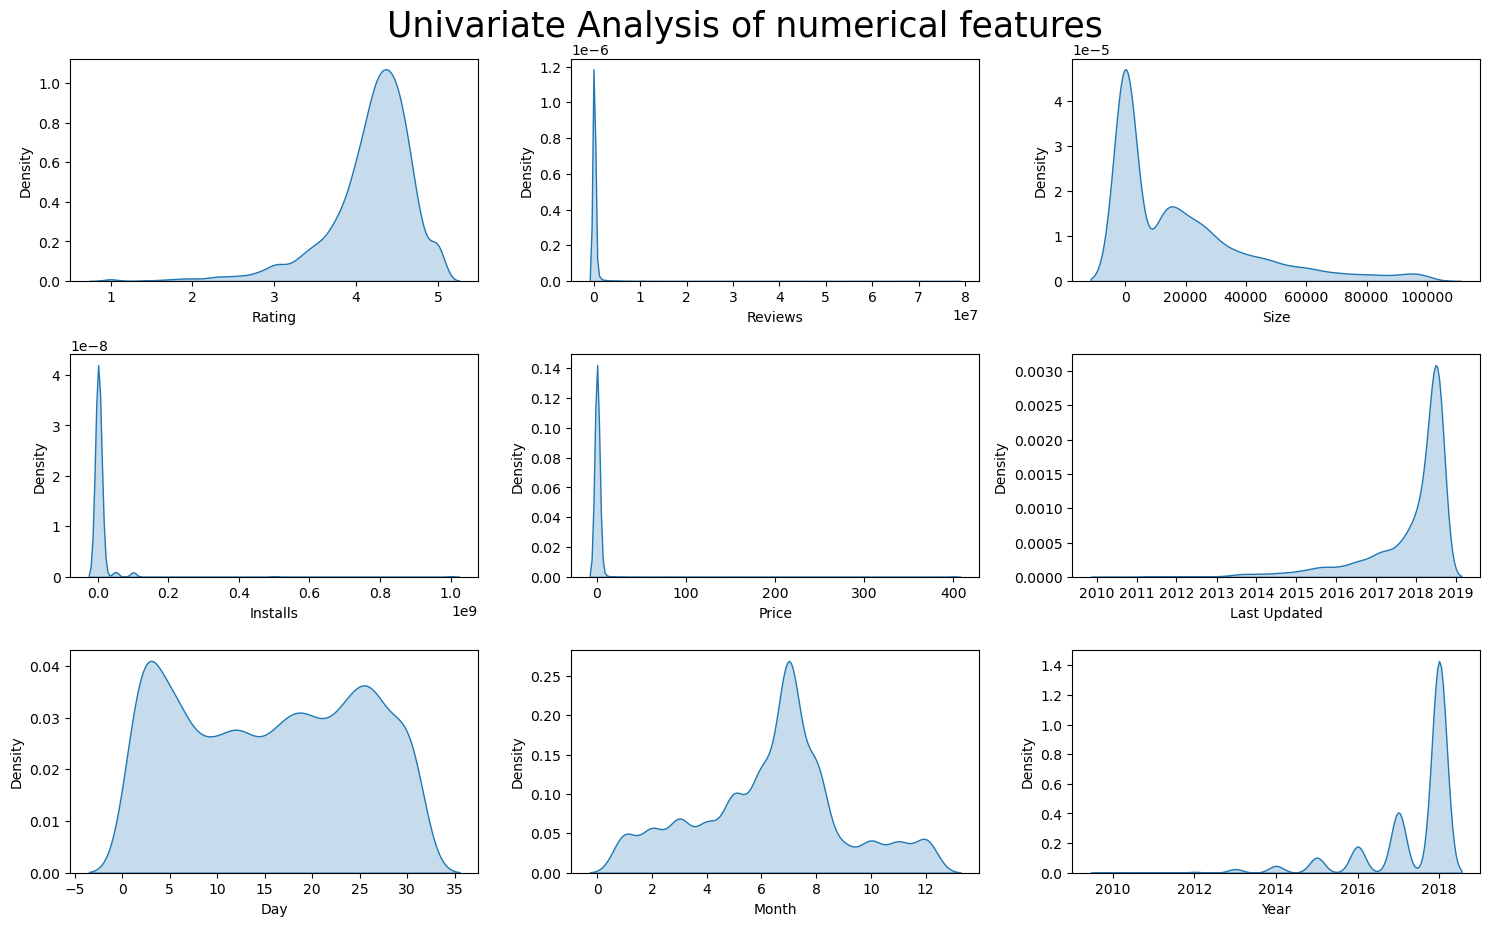

In [49]:
plt.figure(figsize = (15,15))
# subplot title 
plt.suptitle('Univariate Analysis of numerical features',fontsize = 25)

for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df_copy[numerical_features[i]],shade = True)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### <font color = '#AA00FF'> Observation :
* Rating, Last updated and year are left skewed.
* Reviews, Size, Installs, Price are right skewed. 

---

### <font color = 'Blue'> Proportion of count data on Categorical columns visually 

In [50]:
print(categorical_features)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


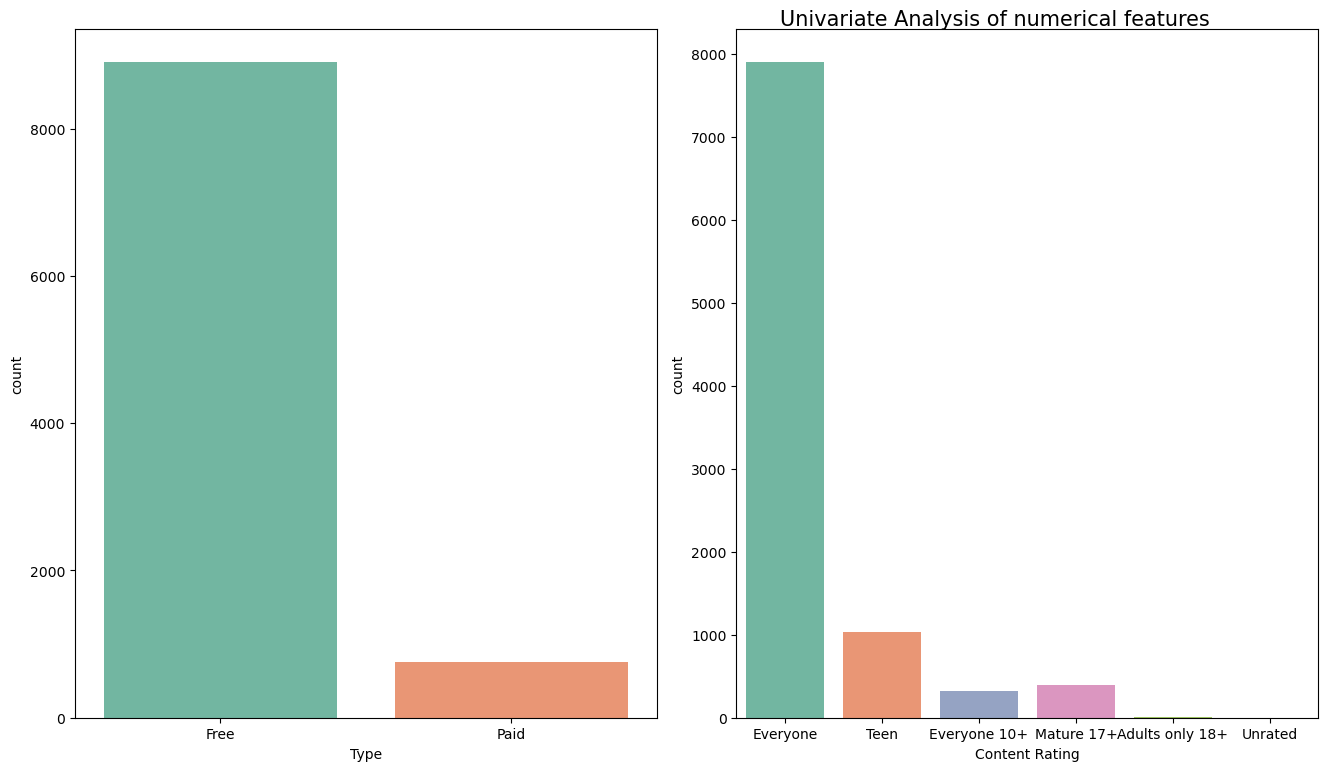

In [51]:
plt.figure(figsize = (20,15))
# subplot title 
plt.suptitle('Univariate Analysis of numerical features',fontsize = 15)
category = ['Type','Content Rating']

for i in range(len(category)):
    plt.subplot(2,3,i+1)
    sns.countplot(x = df_copy[category[i]],palette = 'Set2')
    plt.xlabel(category[i])
    plt.tight_layout()

---

## <font color = 'blue'> Questions

## 1. Which is the most popular app category?

In [52]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<AxesSubplot:ylabel='Category'>

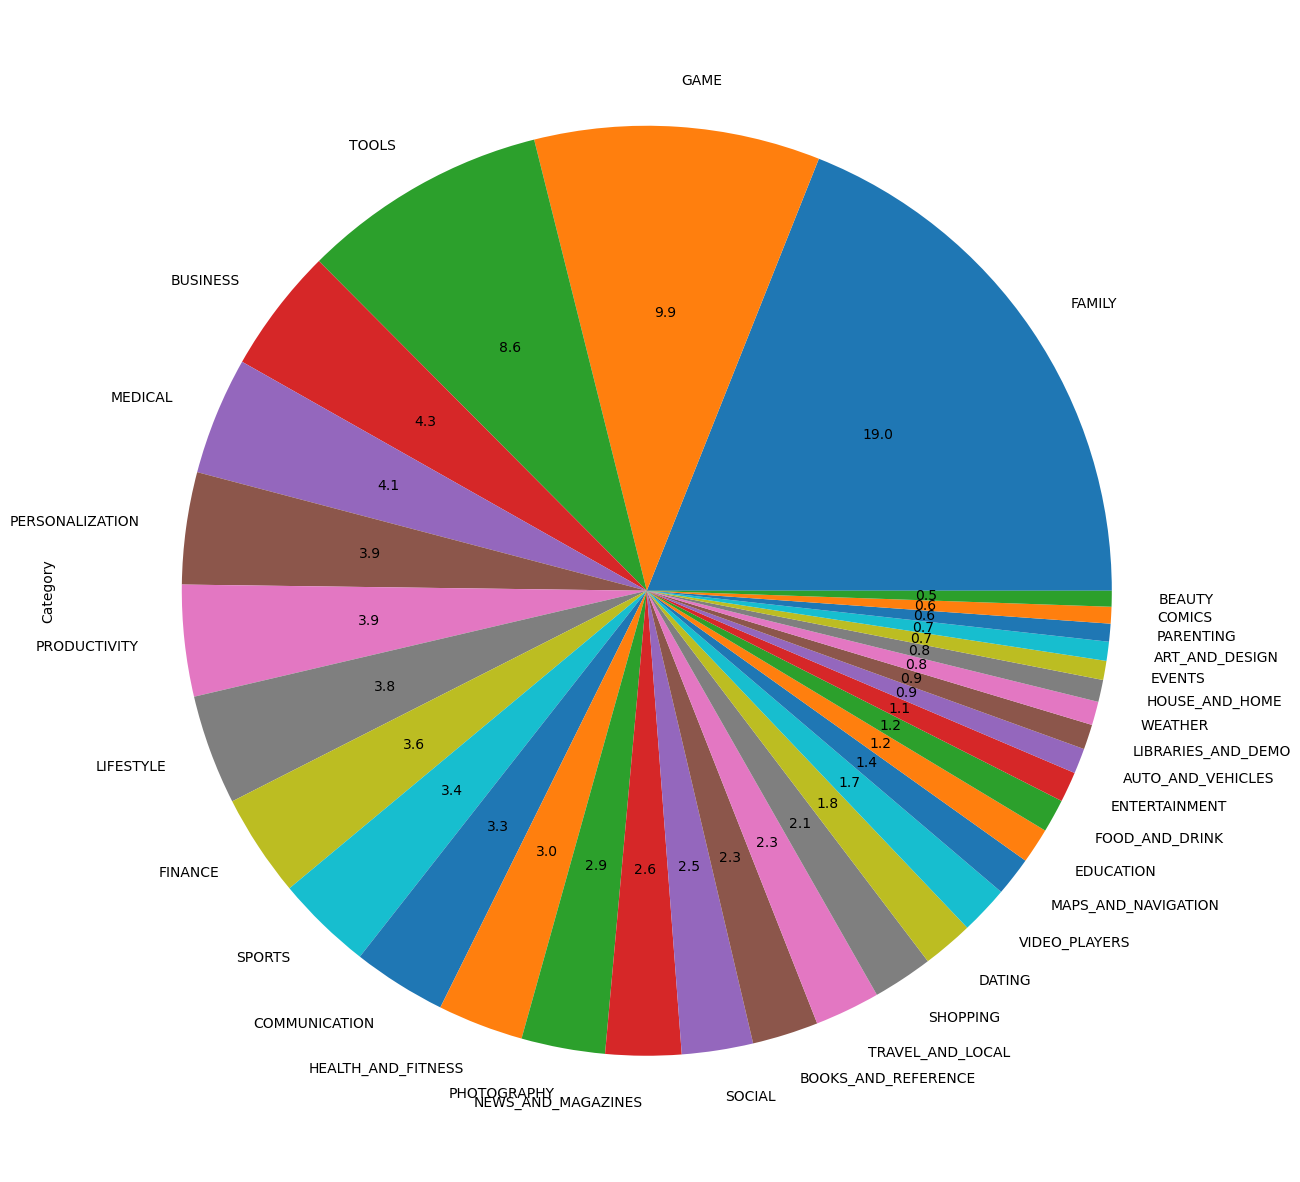

In [53]:
df_copy['Category'].value_counts().plot.pie(y = df['Category'],figsize = (15,16),autopct = '%1.1f')

### <font color = '#AA00FF'> Conclusion :
1. There are more kinds of apps in playstore which are under category of family, games and tools.
2. Beauty, comics, arts and weather kinds of apps are very less in playstore.

---

## 2. What are the top 10 app category?

In [54]:
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns = {'Category' : 'Count'}, inplace = True)

category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


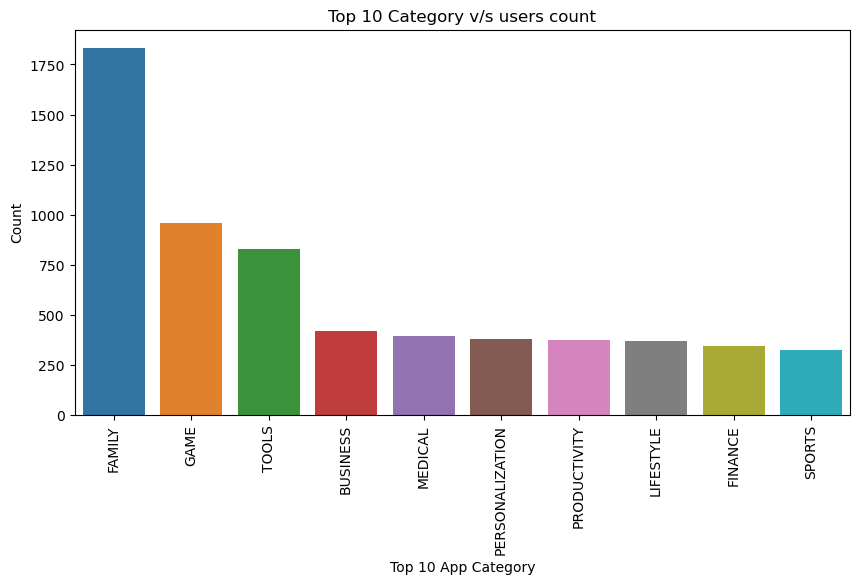

In [55]:
plt.figure(figsize = (10,5))

sns.barplot(data = category[:10], x = category.index[:10] , y = 'Count')

plt.title('Top 10 Category v/s users count')
plt.xlabel('Top 10 App Category')
plt.xticks(rotation = 90)
plt.show()

### <font color = '#AA00FF'> Conclusion :
* Family app category has the most number of apps with 1832 count(19%), then followed by Games with 9.9% apps. 
* Beauty and comics has least number of apps in there category.

---

## <font color = 'blue'> Internal assignments

## 1. Which category has largest number of installation ?

In [56]:
downloads = pd.DataFrame(df_copy.groupby('Category')['Installs'].sum())
downloads.sort_values(by='Installs', ascending=False , inplace = True)
downloads.reset_index(inplace = True)

# Coverting intalls into billions [1B = 1,000,000,000]
downloads['Installs'] = downloads['Installs'] / 1000000000

downloads

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


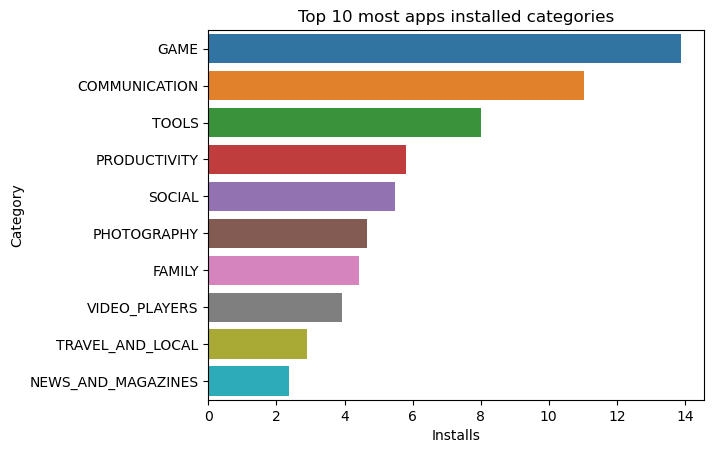

In [57]:
plt.title('Top 10 most apps installed categories')

sns.barplot(data = downloads, x = downloads['Installs'][:10],y = downloads['Category'][:10])

plt.show()

### <font color = '#AA00FF'> Conclusion :
* Game app category has most installation(13.87 Billion), then Communication has second most installed app Category(11.03 Billion).

---

## 2. How many apps are there on Google play store which get 5 star rating ? 

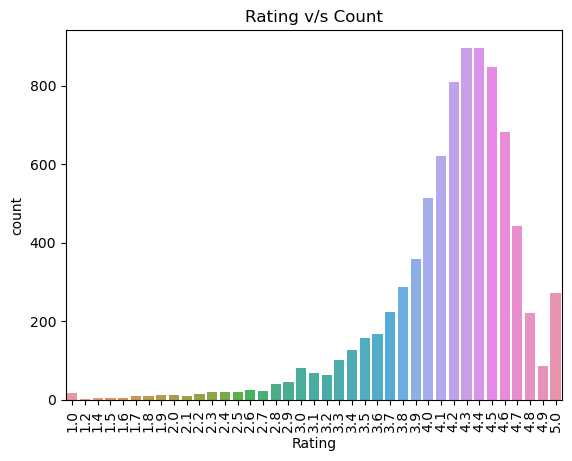

In [58]:
plt.title('Rating v/s Count')

sns.countplot(x = df_copy['Rating'])

plt.xticks(rotation = 90 )
plt.show()

In [59]:
df_copy['Rating'].value_counts()[5.0]

271

### <font color = '#AA00FF'> Conclusion :
* There are 274 apps in play store which have 5 star rating.
* We can also notice that most apps are given rating in the range of 4.0 to 4.7

---

## 3. What are the top 5 most installed apps FROM top 5 most popular Categories ?

In [60]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


### <font color = 'blue'> Taking top 5 categories from dataset.

In [61]:
top_5_categories = list(df_copy['Category'].value_counts()[:5].index)

top_5_categories

['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']

### <font color = 'blue'>Taking record of top categories and then sorting them by number of installs then taking top 5 records

In [62]:
# df_copy[df_copy['Category'] == top_5_categories[0]]
# f_copy[df_copy['Category'] == top_5_categories[0]].sort_values(by=['Installs'],ascending=False)
df_copy[df_copy['Category'] == top_5_categories[0]].sort_values(by=['Installs'],ascending=False)[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
6269,Bitmoji – Your Personal Emoji,FAMILY,4.6,2312084,NaN,100000000,Free,0.0,Teen,Entertainment,2018-07-25,Varies with device,4.3 and up,25,7,2018
4229,Where's My Water? Free,FAMILY,4.4,1372013,57000.0,100000000,Free,0.0,Everyone,Puzzle;Brain Games,2017-11-21,1.10.0,4.1 and up,21,11,2017
4111,Talking Tom Cat 2,FAMILY,4.3,3213548,55000.0,100000000,Free,0.0,Everyone 10+,Entertainment,2018-07-25,5.3.5.16,4.1 and up,25,7,2018
6849,Bubble Witch 2 Saga,FAMILY,4.3,2838064,NaN,100000000,Free,0.0,Everyone,Casual,2018-08-06,Varies with device,Varies with device,6,8,2018
4329,Tom Loves Angela,FAMILY,4.1,1111915,50000.0,100000000,Free,0.0,Everyone,Entertainment,2018-04-30,2.2.1.3,4.1 and up,30,4,2018


###  <font color = 'blue'>After taking top 5 records we have to extract the app names

In [63]:
df_copy[df_copy['Category'] == top_5_categories[0]].sort_values(by=['Installs'],ascending=False)[:5]['App']

6269    Bitmoji – Your Personal Emoji
4229           Where's My Water? Free
4111                Talking Tom Cat 2
6849              Bubble Witch 2 Saga
4329                 Tom Loves Angela
Name: App, dtype: object

In [64]:
list(df_copy[df_copy['Category'] == top_5_categories[0]].sort_values(by=['Installs'],ascending=False)[:5]['App'].values)

['Bitmoji – Your Personal Emoji',
 "Where's My Water? Free",
 'Talking Tom Cat 2',
 'Bubble Witch 2 Saga',
 'Tom Loves Angela']

## Function which perform our operation

In [65]:
top_5_categories = list(df_copy['Category'].value_counts()[:5].index)
top_5_installed_apps = []

for top_cat in top_5_categories:
    top_5_installed_apps.append(list(df_copy[df_copy['Category'] == top_cat].sort_values(by = ['Installs'] , ascending = False)[:5]['App'].values))

In [66]:
top_5_categories

['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']

In [67]:
top_5_installed_apps

[['Bitmoji – Your Personal Emoji',
  "Where's My Water? Free",
  'Talking Tom Cat 2',
  'Bubble Witch 2 Saga',
  'Tom Loves Angela'],
 ['Subway Surfers',
  'Candy Crush Saga',
  'Temple Run 2',
  'Pou',
  'My Talking Tom'],
 ['Google',
  'Google Translate',
  'Clean Master- Space Cleaner & Antivirus',
  'Security Master - Antivirus, VPN, AppLock, Booster',
  'Gboard - the Google Keyboard'],
 ['File Commander - File Manager/Explorer',
  'OfficeSuite : Free Office + PDF Editor',
  'Indeed Job Search',
  'Docs To Go™ Free Office Suite',
  'Vault-Hide SMS,Pics & Videos,App Lock,Cloud backup'],
 ['Blood Pressure',
  'My Calendar - Period Tracker',
  'GoodRx Drug Prices and Coupons',
  'Ovia Fertility Tracker & Ovulation Calculator',
  'Ada - Your Health Guide']]

### <font color = 'blue'> Converting into dictionary 

In [68]:
top_5_installes_app_in_top_5_Categories = { key : value for key,value in zip(top_5_categories,top_5_installed_apps) }

In [69]:
top_5_installes_app_in_top_5_Categories

{'FAMILY': ['Bitmoji – Your Personal Emoji',
  "Where's My Water? Free",
  'Talking Tom Cat 2',
  'Bubble Witch 2 Saga',
  'Tom Loves Angela'],
 'GAME': ['Subway Surfers',
  'Candy Crush Saga',
  'Temple Run 2',
  'Pou',
  'My Talking Tom'],
 'TOOLS': ['Google',
  'Google Translate',
  'Clean Master- Space Cleaner & Antivirus',
  'Security Master - Antivirus, VPN, AppLock, Booster',
  'Gboard - the Google Keyboard'],
 'BUSINESS': ['File Commander - File Manager/Explorer',
  'OfficeSuite : Free Office + PDF Editor',
  'Indeed Job Search',
  'Docs To Go™ Free Office Suite',
  'Vault-Hide SMS,Pics & Videos,App Lock,Cloud backup'],
 'MEDICAL': ['Blood Pressure',
  'My Calendar - Period Tracker',
  'GoodRx Drug Prices and Coupons',
  'Ovia Fertility Tracker & Ovulation Calculator',
  'Ada - Your Health Guide']}

---

### <font color = 'blue'> Solution for Question 3 

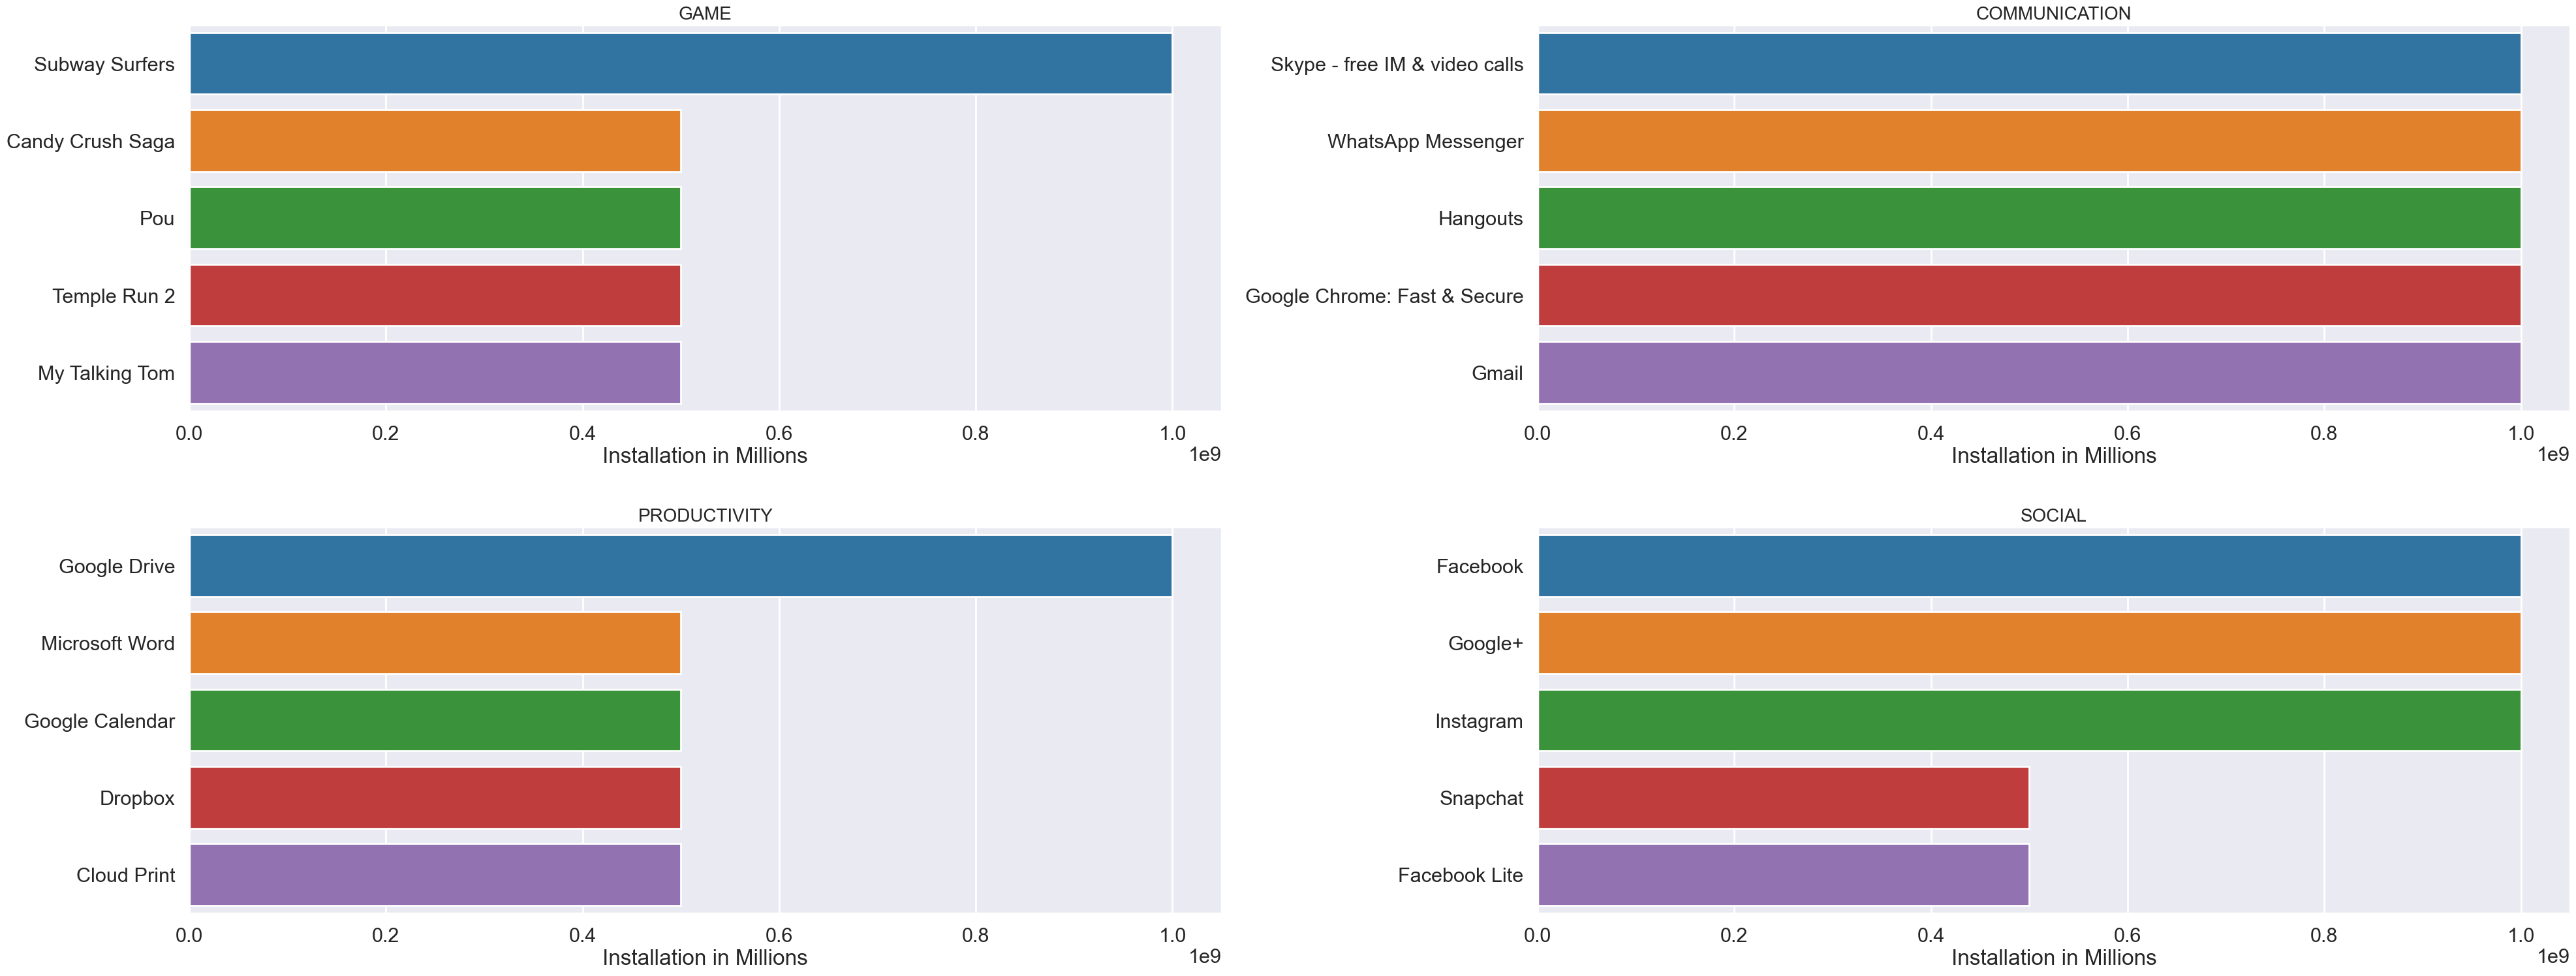

In [70]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

---